# Data structures

(Based https://www.w3schools.com/python/pandas/ and https://realpython.com/python-data-cleaning-numpy-pandas/)

This notebook introduces the Panda Dataframes library. We will learn how to easily load and manipulate data, from selecting or replacing columns and indices to reshaping the data. In short, [Pandas](https://pandas.pydata.org/docs/index.html) uses data such as .csv, .tsv files or a structured query language (SQL) database and turns them into a Python object with rows and columns known as a dataframe. We can think of these objects as analogous to tables available in statistical software like Excel. Just alike Excel, pandas dataframes allow to store and manipulate tabular data in rows of `observations` and columns of `variables`, as well as to extract valuable information from the given data set.

A dataframe can be created from scratch, or you can use other data structures, like NumPy arrays. Here are the main types of inputs accepted by a dataframe:

* Dict of 1D ndarrays, lists, dicts or series
* 2D `numpy.ndarray`
* Structured or record ndarray
* A series
* Another dataframe

# Libraries

In [1]:
#import numpy  as np
import pandas  as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Request zip file from url
from io             import BytesIO
from zipfile        import ZipFile
from urllib.request import urlopen

## 1. Python dictionary

To better understand the nature of a dataframe, first let's consider another composite data type in Python called `dictionary`. It is similar to a list but collects objects instead. Just like lists, dictionaries are mutable and dynamic, this means that they can grow or shrink in size as needed and the elements contained therein can be changed. Dictionaries also can be nested with another dictionary or list. However, the main difference is that elements in a dictionary are accessed via `keys`, whereas elements in a list are accessed via indexing.

### 1.1 Defining dictionaries

We define dictionaries by enclosing a comma-separated list of key:value pairs in braces, where a colon separates each key from its associated value

~~~
my_dictionary = {
    <key> : <value>,
    <key> : <value>,
    <key> : <value>,
          :
          :
    <key> : <value>
}
~~~

Alternatively, we can use the built-in function `dict`, where the argument is a list of key,value tuples in the format

~~~
my_dictionary = dict([
    (<key> , <value>),
    (<key> , <value>),
    (<key> , <value>),
           :
           :
    (<key> , <value>)
])
~~~

In [2]:
# Define a dictionary using braces
atomic_mass = {
    "H" : 1.00794,
    "He": 4.002602,
    "Li": 6.941,
    "Be": 9.012182,
    "B" : 10.811,
    "C" : 12.0107,
    "N" : 14.0067,
    "O" : 15.9994,
    "F" : 18.9984032,
    "Ne": 20.1797
}

# Define a dictionary using the built-in dict function
pauling_electronegativity = dict([
    ("H" , 2.20),
    ("He", None),
    ("Li", 0.98),
    ("Be", 1.57),
    ("B" , 2.04),
    ("C" , 2.55),
    ("N" , 3.04),
    ("O" , 3.44),
    ("F" , 3.98),
    ("Ne", None)
])

# Define a dictionary of lists
atomic_structure = {
    "H" : ["1s1"],
    "He": ["1s2"],
    "Li": ["1s2", "2s1"],
    "Be": ["1s2", "2s2"],
    "B" : ["1s2", "2s2", "2p1"],
    "C" : ["1s2", "2s2", "2p2"],
    "N" : ["1s2", "2s2", "2p3"],
    "O" : ["1s2", "2s2", "2p4"],
    "F" : ["1s2", "2s2", "2p5"],
    "Ne": ["1s2", "2s2", "2p6"]
}

# Define a dictionary of element names
element_name = {
    "H" : "Hydrogen",
    "He": "Helium",
    "Li": "Lithium",
    "Be": "Beryllium",
    "B" : "Boron",
    "C" : "Carbon",
    "N" : "Nitrogen",
    "O" : "Oxygen",
    "F" : "Fluorine",
    "Ne": "Neon"
}

# Define a simple dictionary containing strings
strings_dict =dict(
    a = "alpha",
    b = "beta",
    g = "gamma",
    d = "delta",
    e = "epsilon"
)

In [3]:
# Access elements in the dictionary
atomic_mass["O"]

15.9994

### 1.2 Nested dictionaries

As already stated, dictionaries can contain as many dictionaries as needed. This is called nesting.

In [4]:
# Dictionary of dictionaries
atomic_properties = {
    "mass"              : atomic_mass,
    "electronegativity" : pauling_electronegativity,
    "structure"         : atomic_structure
}

# Create a dictionary of dictionaries using the already defined element dictionaries
elements = {
    element: {
        "name": element_name[element],
        "properties": {
            property: atomic_properties[property][element]
            for property in atomic_properties
        }
    }
    for element in element_name
}
print(elements)


{'H': {'name': 'Hydrogen', 'properties': {'mass': 1.00794, 'electronegativity': 2.2, 'structure': ['1s1']}}, 'He': {'name': 'Helium', 'properties': {'mass': 4.002602, 'electronegativity': None, 'structure': ['1s2']}}, 'Li': {'name': 'Lithium', 'properties': {'mass': 6.941, 'electronegativity': 0.98, 'structure': ['1s2', '2s1']}}, 'Be': {'name': 'Beryllium', 'properties': {'mass': 9.012182, 'electronegativity': 1.57, 'structure': ['1s2', '2s2']}}, 'B': {'name': 'Boron', 'properties': {'mass': 10.811, 'electronegativity': 2.04, 'structure': ['1s2', '2s2', '2p1']}}, 'C': {'name': 'Carbon', 'properties': {'mass': 12.0107, 'electronegativity': 2.55, 'structure': ['1s2', '2s2', '2p2']}}, 'N': {'name': 'Nitrogen', 'properties': {'mass': 14.0067, 'electronegativity': 3.04, 'structure': ['1s2', '2s2', '2p3']}}, 'O': {'name': 'Oxygen', 'properties': {'mass': 15.9994, 'electronegativity': 3.44, 'structure': ['1s2', '2s2', '2p4']}}, 'F': {'name': 'Fluorine', 'properties': {'mass': 18.9984032, 'ele

In [5]:
# Access mass for an element in the dictionary
element = "O"

print(f"atomic mass for {element} = {elements[element]['properties']['mass']}\n" )

# Access the shell structure of the element
print(f"Shell structure for {elements[element]['name']}\n")
for idx, shell in enumerate( elements[element]['properties']['structure']):
    print(f"shell {idx+1} for {element} = "
          f"{atomic_properties['structure'][element][idx]}" )

atomic mass for O = 15.9994

Shell structure for Oxygen

shell 1 for O = 1s2
shell 2 for O = 2s2
shell 3 for O = 2p4


### 1.3 Assign default values for missing items

In order to prevent a runtime error while trying to access data from inexistent keys in a dictionary, we can use the attribute `get` and assign a default value

In [6]:
element = "O"

# Access the value for a key in a simple dictionary
print(f"atomic mass for {element} = "
      f"{atomic_mass.get(element, 'not found')}")

# Access the value for a key in a dictionary of dictionaries
print(f"atomic mass for {element} = "
      f"{elements.get(element, {}).get('properties', {}).get('mass', 'not found')}")

atomic mass for O = 15.9994
atomic mass for O = 15.9994


## Assignment: Working with Atomic Properties
Objective:
Write a Python program that utilizes the dictionary of dictionaries to perform various operations related to chemical elements.


In [34]:
# Write a Python program that utilizes the dictionary of dictionaries "elements" to perform various operations related to chemical elements.
# The program should have the following features:
# 1. Ask the user to enter the symbols of an element.
# 2. Print the available properties for the element.
# 3. Ask the user if they want to list all elements.
# 4. If the user answers "yes", print a list of all elements.
# 5. If the user answers "no", exit the program.
# 6. If the user enters an element that is not in the dictionary, print "Element not found."

element = input("Symbol of an element: ")

# Print the available properties for the element
if element in elements:
    print(f"Name: {elements[element]['properties']['name']}")
    print(f"Atomic Mass: {elements[element]['properties']['mass']}")
    print(f"Electronegativity: {elements[element]['properties']['electronegativity']}")
    print(f"Structure: {', '.join(elements[element]['properties']['structure'])}")
else:
    print("Element not found.")

list_all = input("Do you want to list all elements? (yes/no): ")
if list_all.lower() == "yes":
    print("Elements:", ", ".join(elements.keys()))


Name: Oxygen
Atomic Mass: 15.9994
Electronegativity: 3.44
Structure: 1s2, 2s2, 2p4
Elements: H, He, Li, Be, B, C, N, O, F, Ne


## 2. Pandas Data Structures

Pandas provides two types of data structures: **Series** and **DataFrames**:

- A **Series** is a one dimensional data structure (“a one dimensional ndarray”) that can store values — and for every value it holds a unique index.

- A **DataFrame** is a two (or more) dimensional data structure – basically a table with rows and columns. The columns have names and the rows have indexes.

<img src="https://github.com/rhennig/EMA6938/blob/main/Notebooks/Figures/Pandas.png?raw=1" alt="Confusion Matrix" align="center" style="width:500px; float:center"/>

In [35]:
# Create a Pandas DataFrame

# Using a dict of ndarray/lists
data = {
  'Element':  ['Titanium', 'Vanadium', 'Manganese',
               'Chromium', 'Iron', 'Cobalt', 'Nickel'],
  'Z':        [22, 23, 24,
                25, 26, 27, 28],
  'Magnetism':['Paramagnetic', 'Paramagnetic', 'Complex',
               'Antiferromagnetic', 'Ferromagnetic', 'Ferromagnetic', 'Ferromagnetic']
}

# Load data into a DataFrame object:
dataframe = pd.DataFrame(data)

print(dataframe)

     Element   Z          Magnetism
0   Titanium  22       Paramagnetic
1   Vanadium  23       Paramagnetic
2  Manganese  24            Complex
3   Chromium  25  Antiferromagnetic
4       Iron  26      Ferromagnetic
5     Cobalt  27      Ferromagnetic
6     Nickel  28      Ferromagnetic


In [36]:
# Alternatively, create Pandas DataFrame from lists of lists
data = [['Titanium',  22, 'Paramagnetic'],
        ['Vanadium',  23, 'Paramagnetic'],
        ['Manganese', 24, 'Complex'],
        ['Chromium',  25, 'Antiferromagnetic'],
        ['Iron',      26, 'Ferromagnetic'],
        ['Cobalt',    27, 'Ferromagnetic'],
        ['Nickel',    28, 'Ferromagnetic']]

# Load data into a DataFrame object:
dataframe = pd.DataFrame(data, columns = ['Element', 'Z', 'Magnetism'])

print(dataframe)

     Element   Z          Magnetism
0   Titanium  22       Paramagnetic
1   Vanadium  23       Paramagnetic
2  Manganese  24            Complex
3   Chromium  25  Antiferromagnetic
4       Iron  26      Ferromagnetic
5     Cobalt  27      Ferromagnetic
6     Nickel  28      Ferromagnetic


### Locate Row

As you can see from the result above, the DataFrame is like a table with rows and columns.

Pandas use the loc attribute to return one or more specified row(s).

In [37]:
# Access all datta for a row
print( dataframe.loc[0] )

Element          Titanium
Z                      22
Magnetism    Paramagnetic
Name: 0, dtype: object


Note that this example returns a Pandas Series.

In [38]:
# Access data for multiple entries
dataframe.loc[ [0,2,4] ]

,Element,Z,Magnetism
0,Titanium,22,Paramagnetic
2,Manganese,24,Complex
4,Iron,26,Ferromagnetic


When using [], the result is a Pandas DataFrame.

In [39]:
# Access data for a given column
dataframe.loc[:, 'Magnetism']

0         Paramagnetic
1         Paramagnetic
2              Complex
3    Antiferromagnetic
4        Ferromagnetic
5        Ferromagnetic
6        Ferromagnetic
Name: Magnetism, dtype: object

In [40]:
# Conditional that returns a boolean Series
dataframe[ dataframe['Magnetism'] == 'Ferromagnetic' ]

,Element,Z,Magnetism
4,Iron,26,Ferromagnetic
5,Cobalt,27,Ferromagnetic
6,Nickel,28,Ferromagnetic


> ## Assignment
> Filter the dataframe to return only Ferromagnetic and Paramagnetic elements

In [41]:
# Filter dataframe for Ferromagnetic and Paramagnetic materials
# Using the OR operator
dataframe[ (dataframe['Magnetism'] == 'Ferromagnetic') | (dataframe['Magnetism'] == 'Paramagnetic') ]

# Using the isin method
dataframe[ dataframe['Magnetism'].isin(['Ferromagnetic', 'Paramagnetic']) ]

,Element,Z,Magnetism
0,Titanium,22,Paramagnetic
1,Vanadium,23,Paramagnetic
4,Iron,26,Ferromagnetic
5,Cobalt,27,Ferromagnetic
6,Nickel,28,Ferromagnetic


### Named Indices

With the index argument, you can name your own indexes.

In [42]:
# Give each row a name
dataframe = pd.DataFrame( data, index=['Ti','V','Mn','Cr','Fe','Co','Ni'] )

print('DataFrame:\n', dataframe)

# Refer to the named index:
print(f"\nRefer to names index:"
      f"\n{dataframe.loc['Mn']}")

DataFrame:
             0   1                  2
Ti   Titanium  22       Paramagnetic
V    Vanadium  23       Paramagnetic
Mn  Manganese  24            Complex
Cr   Chromium  25  Antiferromagnetic
Fe       Iron  26      Ferromagnetic
Co     Cobalt  27      Ferromagnetic
Ni     Nickel  28      Ferromagnetic

Refer to names index:
0    Manganese
1           24
2      Complex
Name: Mn, dtype: object


## 2. Working with CSV Files

<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41524-021-00608-3/MediaObjects/41524_2021_608_Fig1_HTML.png" alt="Crystal cleavage" align="right" style="width: 300px;float: right;"/>


A simple and widely used method to store big data sets is to use .csv (comma separated-values) files. These files contain plain text and can be read by most software packages, including Pandas.

In our examples we will be using a .csv file called cleavage_data.csv. This file contains the energy the cleave a number of materials. This was based on a study by Paul et al.:

J. T. Paul, A. Galdi, C. Parzyck, K. Shen, J. Maxson, R. G. Hennig, Computational synthesis of substrates by crystal cleavage. npj Computational Materials, 7,147 (2021), https://doi.org/10.1038/s41524-021-00608-3

In [43]:
# Read a file directly from a .zip file on MaterialsCloud.org
url = urlopen("https://archive.materialscloud.org/record/file?filename=theoreticalCleavedSubstrates.zip&record_id=948")

# Download a .zip file and create pandas DataFrame
zipfile   = ZipFile(BytesIO( url.read() ))

dataframe = pd.read_csv( zipfile.open('database/cleavage_data.csv') )

# Save dataframe to a .csv file
#dataframe.to_csv('cleavage_data.csv', index=False)

# Information about the data
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4614 entries, 0 to 4613
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Substrate Index           4614 non-null   int64  
 1   Materials Project ID      4614 non-null   object 
 2   Initial formation energy  4614 non-null   float64
 3   Final formation energy    4614 non-null   float64
 4   Initial area              4614 non-null   float64
 5   Final area                4614 non-null   float64
 6   Work of Cleavage          4614 non-null   float64
 7   Surface Energy            4614 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 288.5+ KB


In [44]:
# First five data entries
dataframe.head()

,Substrate Index,Materials Project ID,Initial formation energy,Final formation energy,Initial area,Final area,Work of Cleavage,Surface Energy
0,291,mp-1215430,0.805967,0.709898,15.672351,15.672351,0.205704,0.090592
1,3538,mp-1228894,1.895515,1.883755,8.700654,8.700654,0.871436,0.433015
2,1060,mp-754655,2.186383,1.585846,13.489288,13.489288,0.810414,0.293908
3,2841,mp-981544,0.491037,0.394102,12.135709,12.135709,0.121386,0.048712
4,2031,mp-999502,1.359986,1.262626,12.435465,12.435465,0.437454,0.203069


In [45]:
# Last five data entries
dataframe.tail()

,Substrate Index,Materials Project ID,Initial formation energy,Final formation energy,Initial area,Final area,Work of Cleavage,Surface Energy
4609,1544,mp-1068235,0.613948,0.601773,20.464395,20.464395,0.150004,0.073515
4610,368,mp-31380,0.482304,0.461286,17.680294,17.680294,0.109117,0.052181
4611,1107,mp-1215529,0.191980,0.188179,5.948710,5.948710,0.129090,0.063267
4612,898,mp-568993,0.542114,0.486801,16.941106,16.941106,0.159999,0.071837
4613,2565,mp-1224571,1.195508,0.593128,11.280699,11.280699,0.423913,0.105158


In [46]:
# Print information about the data
dataframe.describe()

,Substrate Index,Initial formation energy,Final formation energy,Initial area,Final area,Work of Cleavage,Surface Energy
count,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000
mean,2342.658431,0.777245,0.677913,17.319837,17.319837,0.243117,0.105894
std,1358.743406,0.633077,0.598184,10.523085,10.523085,0.253263,0.118708
min,1.000000,0.004851,0.004851,5.387589,5.387589,0.000925,0.000463
25%,1163.250000,0.414807,0.340569,12.450114,12.450114,0.105097,0.044686
50%,2337.500000,0.643034,0.551580,15.382083,15.382083,0.181605,0.079720
75%,3521.750000,0.971106,0.866148,17.927848,17.927848,0.304334,0.134306
max,4692.000000,9.360227,9.360227,131.170497,131.170497,7.147410,3.573705


In [47]:
# Information about the data
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4614 entries, 0 to 4613
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Substrate Index           4614 non-null   int64  
 1   Materials Project ID      4614 non-null   object 
 2   Initial formation energy  4614 non-null   float64
 3   Final formation energy    4614 non-null   float64
 4   Initial area              4614 non-null   float64
 5   Final area                4614 non-null   float64
 6   Work of Cleavage          4614 non-null   float64
 7   Surface Energy            4614 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 288.5+ KB


The result tells us there are 4614 rows and 8 columns and the name of each column, with the data type.

We also see how many null entries (no values) each column contains. This dataset contains no empty entries.

### 2.1 Cleaning Data

Data scientists spend a large amount of their time cleaning datasets. Often these initial steps of obtaining and cleaning data constitute about 80% of the work in a machine learning project.

Therefore, we need to learn to deal with messy data, whether that means missing values, inconsistent formatting, malformed records, or nonsensical outliers.

Here, we will use the Pandas and NumPy libraries to clean data.

We’ll cover the following:
- Dropping unnecessary columns in a DataFrame
- Changing the index of a DataFrame

#### 2.1.1 Dropping Columns in a DataFrame

Often, not all the categories of data in a dataset are useful for our analysis. For example, a dataset may contain materials information (composition, crystal structure, thermodynamics data, mechanical, electronic, and magnetic properties) but we may want to focus on analyzing the bulk modulus.

In this case, the electronic, and magnetic properties are not important. Retaining these unneeded categories will take up unnecessary space and potentially also bog down runtime.

Pandas provides a handy way of removing unwanted columns or rows from a DataFrame with the drop() function. Let’s look at a simple example where we drop a number of columns from a DataFrame.

First, let’s use the DataFrame from the CSV file ‘cleavage_data.csv’. In the examples below, we pass a relative path to pd.read_csv, meaning that all of the datasets are in a folder named Datasets in our current working directory:

In [48]:
# First five data entries
dataframe.head()

,Substrate Index,Materials Project ID,Initial formation energy,Final formation energy,Initial area,Final area,Work of Cleavage,Surface Energy
0,291,mp-1215430,0.805967,0.709898,15.672351,15.672351,0.205704,0.090592
1,3538,mp-1228894,1.895515,1.883755,8.700654,8.700654,0.871436,0.433015
2,1060,mp-754655,2.186383,1.585846,13.489288,13.489288,0.810414,0.293908
3,2841,mp-981544,0.491037,0.394102,12.135709,12.135709,0.121386,0.048712
4,2031,mp-999502,1.359986,1.262626,12.435465,12.435465,0.437454,0.203069


When we look at the first five entries using the head() method, we can see that a handful of columns provide ancillary information that may not be of interest if we want to select a substrate materials for a synthesis experiment: `Initial formation energy`, `Final formation energy`, `Initial area`.

We can drop these columns.

In [49]:
# Define a list of column names to drop.
columns_to_drop = ['Initial formation energy', 'Final formation energy', 'Initial area']

# Tell pandas to drop these columns directly in the dataset (inplace = True)
dataframe.drop(columns=columns_to_drop, inplace=False).head()

,Substrate Index,Materials Project ID,Final area,Work of Cleavage,Surface Energy
0,291,mp-1215430,15.672351,0.205704,0.090592
1,3538,mp-1228894,8.700654,0.871436,0.433015
2,1060,mp-754655,13.489288,0.810414,0.293908
3,2841,mp-981544,12.135709,0.121386,0.048712
4,2031,mp-999502,12.435465,0.437454,0.203069


Alternatively, if we know which columns we need, we could pass the names of the columns as a list to the `usecols` argument of `pd.read_csv`.

#### 2.1.2 Changing the Index of a DataFrame

A Pandas Index extends the functionality of NumPy arrays to allow for more versatile slicing and labeling. In many cases, it is helpful to use a uniquely valued identifying field of the data as its index.

For example, in the cleavage dataset, we may want to use the `Substrate Index` as a unique identifier.

In [50]:
# Check that the Substrate Index is a unique identifier
dataframe['Substrate Index'].is_unique

True

In [51]:
# Let’s replace the existing index with this column using set_index
dataframe.set_index('Substrate Index', inplace=False).head()

,Materials Project ID,Initial formation energy,Final formation energy,Initial area,Final area,Work of Cleavage,Surface Energy
Substrate Index,,,,,,,
291,mp-1215430,0.805967,0.709898,15.672351,15.672351,0.205704,0.090592
3538,mp-1228894,1.895515,1.883755,8.700654,8.700654,0.871436,0.433015
1060,mp-754655,2.186383,1.585846,13.489288,13.489288,0.810414,0.293908
2841,mp-981544,0.491037,0.394102,12.135709,12.135709,0.121386,0.048712
2031,mp-999502,1.359986,1.262626,12.435465,12.435465,0.437454,0.203069


There are many other ways that Pandas can help us clean data, such as:
- Dealing with empty cells
- Using .str() methods to clean columns
- Using the DataFrame.applymap() function to clean the entire dataset, element-wise
- Renaming columns to a more recognizable set of labels
- Skipping unnecessary rows in a .csv file
- Remove duplicate entries

#### 2.1.3 Dealing with outliers

In machine learning, the training data determines the accuracy and effectiveness of models. However, the presence of outliers can impact the performance of the model. These can arise due to various factors such as measurement errors, data corruption, or anomalies in the data. We need to identify data points that deviate significantly from the normal distribution of a dataset as they can distort statistical analysis and lead to inaccurate predictions. Detecting and addressing data outliers is the first step to ensuring a high-quality dataset.

Using a dataframe simplifies the task.

In [52]:
mean    = dataframe['Surface Energy'].mean()
std_dev = dataframe['Surface Energy'].std()

lower_bound = mean - 3.0 * std_dev
upper_bound = mean + 3.0 * std_dev

print(f"listing outliers for {lower_bound:.3f} < Surface Energy < {upper_bound:.3f}\n")

dataframe[ (dataframe['Surface Energy'] < lower_bound) | (dataframe['Surface Energy'] > upper_bound) ]

listing outliers for -0.250 < Surface Energy < 0.462



,Substrate Index,Materials Project ID,Initial formation energy,Final formation energy,Initial area,Final area,Work of Cleavage,Surface Energy
225,4073,mp-1221500,4.813277,4.813277,14.746971,14.746971,1.305564,0.652782
284,3055,mp-1222701,6.461368,6.461368,13.386436,13.386436,1.930721,0.965360
288,2746,mp-1217706,4.979154,4.979154,10.889643,10.889643,1.371713,0.685856
292,472,mp-1206825,2.660219,2.288781,12.191734,12.191734,1.090993,0.469330
410,15,mp-1029337,2.822857,2.524273,11.708923,11.708923,1.205430,0.538963
412,1498,mp-3556,2.661864,2.244377,12.125774,12.125774,1.097606,0.462729
431,3659,mp-12670,2.637503,2.388400,12.422165,12.422165,1.061612,0.480673
525,498,mp-2542,1.912039,1.872623,6.358898,6.358898,1.202749,0.588977
630,4228,mp-1014251,7.916778,7.916778,9.233065,9.233065,3.429751,1.714875
785,1349,mp-21473,8.194174,8.194174,15.176868,15.176868,2.699560,1.349780


## 3. Use Seaborn and Pandas to plot the data

[Seaborn](https://seaborn.pydata.org) is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with Pandas data structures. The plotting functions on Seaborn operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots.

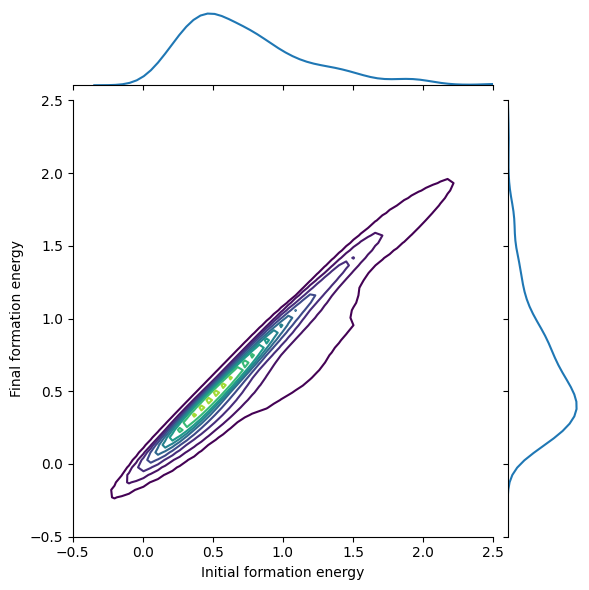

In [53]:
# Bivariate and univariate graph for two properties in the dataframe

sns.jointplot(data=dataframe, x="Initial formation energy", y="Final formation energy",
              xlim=(-0.5,2.5), ylim=(-0.5,2.5), kind="kde", cmap="viridis")

plt.show()

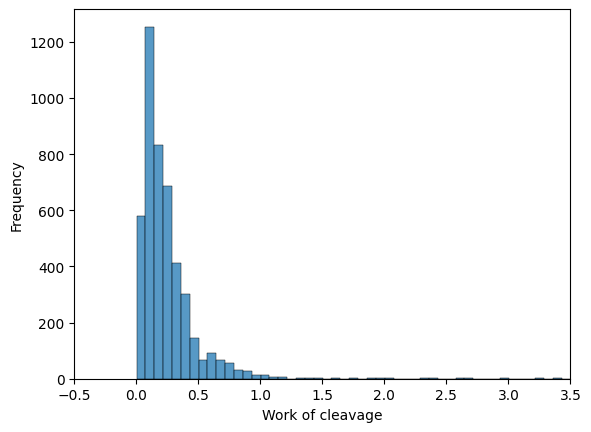

In [54]:
# Create a distribution for the work of cleavage

sns.histplot(dataframe["Work of Cleavage"], bins=100, line_kws={"linewidth":3}, kde=False)

plt.xlabel("Work of cleavage")
plt.ylabel("Frequency")

plt.xlim(-0.5,3.5)

plt.show()